<a href="https://colab.research.google.com/github/jgodet/L1SpS_UE5/blob/main/Exemples_de_cours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemples de codes utilisés dans le cours **modélisation**

Voici les librairies dont on va avoir besoin dans les exemples

In [15]:
from numpy import *
from scipy import integrate
import pylab as p
import matplotlib.pyplot as plt

## Croissance ou décroissances exponentielles

Cet exemple illustre les modèles du type 
$$X' = r.X$$

Vous pouvez changer la valeur de r et la valeur de X0 pour voir ce qui se passe...

In [5]:
def dX_dt(X, t=0):
    """ Return the growth rate of bacteria. """
    return array([ r*X[0] ])

In [6]:
t = linspace(0, 100,  101)              # temps
r = 0.05         # vitesse de croissance 
X0 = [10]        # 10 bactéries au départ
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

Text(0.5, 1.0, 'Evolution du nombre de bactéries')

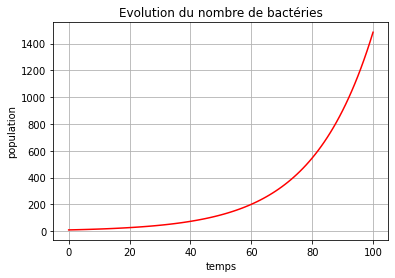

In [7]:
Virus = X.T
p.plot(t, Virus[0], 'r-')
p.grid()
p.xlabel('temps')
p.ylabel('population')
p.title('Evolution du nombre de bactéries')

## Modèle monocompartimental - bolus IV

Modèle du type 
$$X' = -k_e.X$$

In [8]:
def dX_dt(X, t=0):
    return array([ - ke*X[0] ])

In [9]:
t = linspace(0, 100,  101)              # temps
ke = 0.1         # constante d'élimination
X0 = [100]        # C0
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message'] 

'Integration successful.'

Text(0.5, 1.0, 'Evolution de la concentration sanguine')

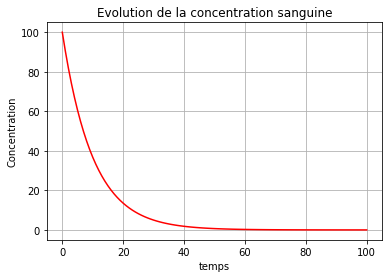

In [10]:
conc = X.T
p.plot(t, conc[0], 'r-')
p.grid()
p.xlabel('temps')
p.ylabel('Concentration')
p.title('Evolution de la concentration sanguine')

## Modèle monocompartimental - perfusion IV

$$X' = k_i - k_e .X$$

In [ ]:
def dX_dt(X, t=0):
    return array([ ki - ke*X[0] ])

In [ ]:
t = linspace(0, 1000,  1001)              # temps
ki = 0.05         # vitesse de perf 
ke = 0.01         # cst d'élimination
X0 = [0]        # Concentration au temps 0
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message'] 

In [ ]:
conc = X.T
p.plot(t, conc[0], 'r-')
p.grid()
p.xlabel('temps')
p.ylabel('Concentration')
p.title('Evolution de la concentration sanguine')

### Modification
Si on modifie le modèle pour simuler une poche de perfusion qui finit pas se vider complètement

In [ ]:
def dX_dt(X, t=0):
    if(t<500):
      res = array([ ki - ke*X[0] ])
    else:
      res = array([ - ke*X[0] ])
    return res 

t = linspace(0, 1000,  1001)              # temps
ki = 0.05         # vitesse de perf 
ke = 0.01         # cst d'élimination
X0 = [0]        # Concentration au temps 0
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message'] 

conc = X.T
p.plot(t, conc[0], 'r-')
p.grid()
p.xlabel('temps')
p.ylabel('Concentration')
p.title('Evolution de la concentration sanguine')

## Modèle bicompartimental - voie orale

$$\frac{\mathrm dA(t)}{\mathrm dt} = - k_A.A(t)$$

$$\frac{\mathrm dB(t)}{\mathrm dt} = k_A.A(t) - k_E.B(t)$$

In [12]:
def dX_dt(X, t=0):
    """ Modele bicompartimental """
    return array([ - ka * X[0],
                  ka * X[0] - ke * X[1] ])

In [13]:
t = linspace(0, 50,  199)  # temps
ka = .1
ke = .4
X0 = array([100, 0])       # conditions initiales
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']  

'Integration successful.'

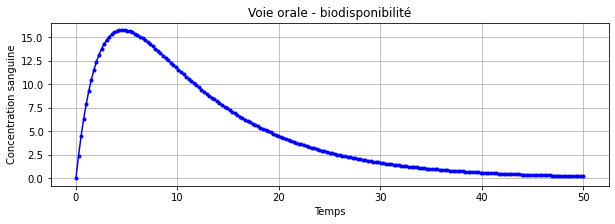

In [16]:
concSang = X.T
plt.figure(figsize=(10,3))
plt.plot(t,concSang[1] ,'b.-')
plt.grid(True)
plt.xlabel('Temps')
plt.ylabel('Concentration sanguine')
plt.title("Voie orale - biodisponibilité")
plt.show()

## Modèle d'infection HIV - cellulaire

Modèle issu du livre **Modeling life - The mathematics of Biological Systems** de Alan Garfinkel · Jane Shevtsov · Yina Guo


$$V’ = 100.E - 2.V$$
$$R’ =0.272 - 0.00136.R - 0.00027.R.V$$
$$E’ = 0.00027.R.V - 0.33.E$$

In [ ]:
def dX_dt(X, t=0):
    """ HIV cellulaire """
    return array([100 * X[2] - 2 * X[0],
                  0.272 - 0.00136 * X[1] - 0.00027 * X[1] * X[0],
                  0.00027 * X[1] * X[0] - 0.33 * X[2]])

In [ ]:
t = linspace(0, 200,  1001)              # temps
X0 = [100, 5e3, 1]     #Virus, Cell non inf, cellules infectées   
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message'] 

In [ ]:
Virus = X.T
p.plot(t, Virus[0], 'r-')
p.grid()
p.xlabel('temps')
p.ylabel('population')
p.title('Evolution du nombre de virus')

## Modèle d'infection HIV - épidémiologie

Modèle issu du livre **Modeling life - The mathematics of Biological Systems** de Alan Garfinkel · Jane Shevtsov · Yina Guo

$$S’ = b - (m + L).S\\
I’ = L.S - (m+v).I\\
A’ = v.I - (m+\alpha).A$$


In [ ]:
def dX_dt(X, t=0):
    """ HIV epidemio """
    L = c * beta * X[1] / (X[0] + X[1])
    return array([ b - ( m + L ) * X[0],
                  L * X[0] - ( m + v) * X[1],
                  v * X[1] - (m + alpha) * X[2]])

In [ ]:
b = 133.3
m = 1/75.
v = 0.125
alpha = 1
beta = 0.5 # changer beta ici
c = 2
t = linspace(0, 20,  101)              # temps
X0 = [9995, 5,0]     #Nb de S, I, A à t=0   
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message'] 

In [ ]:
HIV = X.T
p.plot(t, HIV[0], 'r-'  )
p.plot(t, HIV[1], 'b-'  )
p.plot(t, HIV[2], 'g-'  )
p.grid()
p.legend(['S','I', 'R'])
p.xlabel('temps')
p.ylabel('population')
p.yscale('log')
p.title('Evolution du nombre de virus')

## Modèle logistique

$$X’ = r.X. \left( 1  - \frac{X}{k}\right)$$

où $k$ représente la capacité limite de $X$

In [ ]:
def dX_dt(X, t=0):
    """ logistic """
    return array([ r*X[0]/(1+X[0]/k)])

In [ ]:
t = linspace(0, 10,  101)              # temps
td = 0.3         # temps de doublement de 20 min (en heures)
X0 = [.001]        # 10 bactéries au départ
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message'] 

In [ ]:
Xg = X.T
p.plot(t, Xg[0], 'r-')
p.grid()
p.xlabel('temps')
p.ylabel('Réponse')

## Modèle oscillant - régulation GR

 $$GR’ = \beta. EPO - c.GR\\
 EPO’ = \alpha - \gamma.GR$$

In [ ]:
def dX_dt(X, t=0):
    """ GR """
    return array([beta * X[1] - c* X[0],
                  alpha - gamma * X[0] ])

In [ ]:
t = linspace(0, 2000,  1001)              # temps
alpha =1
beta = 500
c = np.log(2)/121
gamma =1/5e6
X0 = [5e6, 300]        
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message'] 

In [ ]:
GR = X.T
p.plot(t, GR[0], 'r-')
p.grid()
p.xlabel('temps')
p.ylabel('population')
p.title('Evolution du nombre de GR virtuels')

## Modèle de Lotka-Volterra

$$P’ = n.P - \beta.P.R\\
R’ = m.\beta.P.R - d.R$$

In [17]:
def dX_dt(X, t=0):
    """ Return the growth rate of fish and shark populations. """
    return array([ n*X[0] -   beta*X[0]*X[1] ,
                  -d*X[1] + m*beta*X[0]*X[1] ])

In [18]:
t = linspace(0, 20,  199)              # time
n = 1.
beta = 0.1
d = 1.5
m = 0.75
X0 = array([20, 2])                     # initials conditions: 10 fish and 5 sharks
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message'] 

'Integration successful.'

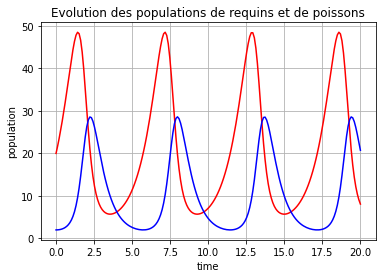

In [19]:
poissons, requins = X.T
f1 = p.figure()
p.plot(t, poissons, 'r-', label='Poissons')
p.plot(t, requins  , 'b-', label='Requins')
p.grid()
#p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution des populations de requins et de poissons')
f1.savefig('sharkAndFish_1.png')